In [4]:
import random
import math
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics
from sklearn import svm
import matplotlib.pyplot as plt
from nltk.stem import *
from collections import defaultdict

In [5]:
DATASET = '../datasets/smsspam.csv'
data = pd.read_csv(DATASET, header=0)

In [6]:
data.head()['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
def my_tokenize(text):
    text = list(filter(lambda x: x not in ',.?!', text.lower()))
    return ''.join(text).split()

In [8]:
words = defaultdict(int)
for index, row in data.iterrows():
    text = row['text']
    cur_words = my_tokenize(text)
    for w in cur_words:
        words[w] += 1
words = [key for key, val in words.items() if val >= 5]

In [9]:
new_data = []
for index, row in data.iterrows():
    text = row['text']
    cur_words = my_tokenize(text)
    new_row = [0 if row['label'] == 'ham' else 1]
    for word in words:
        new_row.append(cur_words.count(word))
    new_data.append(new_row)

In [10]:
data = pd.DataFrame(new_data, columns = ['label'] + words)

In [11]:
def calc_joint_log_likelihood(data):
    values_counts = [[], []]
    for number in [0,1]:
        for feature in data.drop('label', axis=1):
            feature_values = data[data['label'] == number][feature]
            values_counts[number].append(feature_values.value_counts())
    
    def formula(v, vc, vc0, vc1):
        return math.log(vc.get(v, 0) + 1) - math.log(vc0.get(v, 0) + vc1.get(v, 0) + 1)
    
    ans = [[], []]
    for number in [0, 1]:
        for index, row in data.iterrows():
            ans[number].append(0)
            for value_index, value in enumerate(row.drop('label')):
                ans[number][index] += formula(value,
                                              values_counts[number][value_index],
                                              values_counts[0][value_index],
                                              values_counts[1][value_index])
    return ans

def plot(jll, label):
    fpr, tpr, _ = sklearn.metrics.roc_curve(
        label,
        [jll[1][i] - jll[0][i] for i in range(len(jll[0]))])
    plt.plot(fpr, tpr, 'b-')
    plt.show()

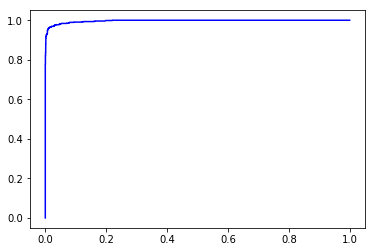

In [12]:
jll = calc_joint_log_likelihood(data)
plot(jll, data['label'])